## Die Chi-Quadrat-Verteilung in Python
----------------------------------------

In [1]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Die wichtigsten Funktionen zur Interaktion mit der $\chi^2$-Verteilung sind `chi2.pdf`(), `chi2.cdf()`, `chi2.ppf()`, `chi2.rvs()`. Die Funktion `chi2.pdf()` liefert die Dichte, die Funktion `chi2.cdf()` die Verteilungsfunktion, die Funktion `chi2.ppf()` die Quantilfunktion und die Funktion `chi2.rvs()` die Zufallsabweichungen.

Wir verwenden die Funktion `chi2.pdf()`, um die Dichte für die ganzzahligen Werte $4$ bis $8$ einer $\chi^2$-Kurve mit $df=7$.

In [2]:
chi2_pdf = []
for i in range(4,9):
    chi2_pdf.append(chi2.pdf(i, df = 7))
chi2_pdf
    

[0.11518072856146785,
 0.12204152134938738,
 0.11676521599113947,
 0.10411977480817192,
 0.08817913751079275]

Wir verwenden `chi2.cdf()`, um die Fläche unter der Kurve für das Intervall $[0,6]$ und das Intervall $[6,\infty[$ einer$\chi^2$-Kurve mit $df=7$ zu berechnen. Weiter fragen wir Python, ob die Summe der Intervalle $[0,6]$ und $[6,\infty[$ den Wert $1$ ergibt.

In [3]:
chi2_cdf1 =  chi2.cdf(6, df = 7)
chi2_cdf1

0.4602506496044429

In [4]:
chi2_cdf2 =  1- chi2.cdf(6, df = 7)
chi2_cdf2

0.539749350395557

In [5]:
chi2_cdf1 + chi2_cdf2

1.0

Wir verwenden `chi2.ppf()`, um das Quantil für eine bestimmte Fläche (= Wahrscheinlichkeit) unter der Kurve für eine $\chi^2$-Kurve mit $df=7$ zu berechnen, die $q=0,25$,$0,5$,$0,75$ und $0,999$ entspricht.

In [8]:
chi2_ppf =  chi2.ppf(0.25, df = 7)
chi2_ppf

4.2548521835465145

In [9]:
chi2_ppf =  chi2.ppf(0.5, df = 7)
chi2_ppf

6.345811195521515

In [10]:
chi2_ppf =  chi2.ppf(0.75, df = 7)
chi2_ppf

9.037147547908143

In [11]:
chi2_ppf =  chi2.ppf(0.999, df = 7)
chi2_ppf

24.321886347856854

Wir verwenden die Funktion `chi2.rvs()`, um $100.000$ Zufallswerte aus der$\chi^2$-Verteilung mit $df=7$ zu erzeugen. Anschließend zeichnen wir ein Histogramm und vergleichen es mit der Wahrscheinlichkeitsdichtefunktion der $\chi^2$-Verteilung mit $df=7$ (orangefarbene Linie).

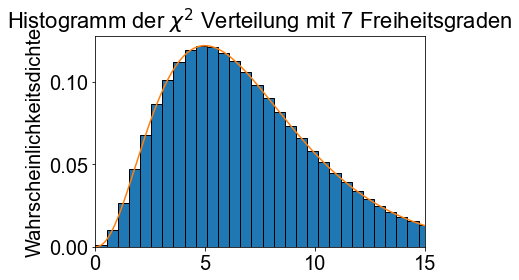

In [12]:
# Erzeuge Chi^2 Werte
chi2_rvs =  chi2.rvs(df = 7,size = 10000000)

# Erzeuge x-werte
x = np.linspace(0,20,num = 1000)

# Plotte t-Verteilung
fig, ax1 = plt.subplots()
plt.xlim(0,15)

ax1.set_title('Histogramm der $\chi^2$ Verteilung mit 7 Freiheitsgraden')
ax1.set_ylabel('Wahrscheinlichkeitsdichte')
ax1.hist(chi2_rvs, bins= 90,edgecolor = 'k',density = True)

 
ax1.plot(x,chi2.pdf(x,df = 7))
ax1.tick_params(axis='y')

fig.tight_layout()

plt.show() 